# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

Start of Exam Submission - 



Data Validation - 

The dataset consists of 15000 rows and 8 columns. The 8 columns are listed below, including information about each column.

- week (int64) - Ranging from week 1 to 6. No data cleaning required.

- sales_method (object) - Started with 5 total sales methods. "em + call" was combined with "Email 					+ Call" and "email" was combined with "Email" to make 3 total sales methods.

- customer_id    (object) - 15000 unique customer_IDs. No data cleaning required.

- nb_sold        (int64) - Ranging from 7 to 16 with 10 units sold being the median. No data cleaning required.

- revenue        (float64) - 1074 entries were showing null. These items were dropped as to not impact results.

- years_as_customer (int64) - Found 2 customers with greater than 39 years as customer. These values were dropped as to not impact results as these customers are older than the company.

- nb_site_visits         (int64) - Ranging from 12 to 41 website visits in the last 6 months. Median is 25 site visits. No data cleaning required.

- state         (object) - California is the most popular state at 1739 customers. No data cleaning required.


New dataset after validation consists of 13924 rows and 8 columns

Exploratory Analysis -

The bar chart below shows the count of customers that recieved each approach. 
Email 6921, Call 4780, Email + Call 2223. Email recieved the most, this could be due to ease of email which also had the lowest time spent per customer. 

![customer count for sales method](customer%20count%20for%20sales%20method.png)


The spread of the revenue is shown below in the boxplot of the revenue.
The boxplot shows that a few outliers exist. The median is at 89.5.
The box plots below show that the median and spread for each sales method is quite different. Email + Call has the highest revenue distribution. This is a good visualization of the spread and skew of the data for each sales method, but is not the best metric to use due to exclusion of outliers.

![Boxplot of Revenue](Boxplot%20of%20Revenue.png)

![boxplot of revenue_sales method](boxplot%20of%20revenue_sales%20method.png)


Instead, the distribution of revenue is shown below in a histogram for each sales method. 
The distribution for each sales method also includes the means for each sales method and is the most important buisness metric to follow as it includes all the data. It is also showing that each mean is different per sales method. Two-sample t tests for each pairing confirm that each mean is statistically independent. The mean is a better metric to answer our buisness metric because this data is continuous and the outliers should be included. The means are 47, 97, and 183 respectively. 

![Histogram of Revenue Distribution(1)](Histogram%20of%20Revenue%20Distribution(1).png)

![revenue distribution by sales method](revenue%20distribution%20by%20sales%20method.png)


The graph below shows the revenue over time by week. Yes, there is a small positive correlation between revenue and time with the correlation being 0.35. 

![Revenue Over Time](Revenue%20Over%20Time.png)


A few notes to add about customers - 

The average years as customer is the lowest for the Email + Call method, but only slightly.
The average site visit is the highest for the customers who recieved an Email + Call. 
The averages are shown below.

The top 3 states for revenue are California, Texas, New York. Those three states also have the most customers per state.

Also, as a fun side note, South Dakota and North Dakota have the highest revenue per customer. The total revenue from these states is near the bottom, so probably not worth any extra time, I just thought I would include it as a fun fact.

![site visits and years as customer](site%20visits%20and%20years%20as%20customer.png)


Recommendation and Buisness Metric -
Since our goal is to make sure we are using the best techniques to sell the new product effectively, average revenue per sales method is a good metric to measure. In the last six weeks Email + Call has been the most effective sales method at generating revenue with the highest average revenue out of the three methods. The Email + Call method can be viewed as the baseline based on our current data and should be considered when moving forward.

Moving forward I would monitor that this method remains the most effective by monitoring the mean revenue for each sales method. 

My recommendation based off of the data from the last six weeks is to send an Email and follow up with a phone call.

The chart below shows how the sales method seems to influence the quality of the sale. The revenue is higher for Email + Call even if a similiar amount of products were sold. The customer is more likely to purchase the more expensive product with an Email + Call sales method. 

![revenue by items sold](revenue%20by%20items%20sold.png)


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_palette("muted")

sales = pd.read_csv('product_sales.csv')


sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [35]:
print(sales.dtypes)

sales.describe(percentiles = [0.5], include = 'all').transpose()

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object


,count,unique,top,freq,mean,std,min,50%,max
week,15000.0,NaN,NaN,NaN,3.098267,1.65642,1.0,3.0,6.0
sales_method,15000,5,Email,7456,NaN,NaN,NaN,NaN,NaN
customer_id,15000,15000,2e72d641-95ac-497b-bbf8-4861764a7097,1,NaN,NaN,NaN,NaN,NaN
nb_sold,15000.0,NaN,NaN,NaN,10.084667,1.812213,7.0,10.0,16.0
revenue,13926.0,NaN,NaN,NaN,93.934943,47.435312,32.54,89.5,238.32
years_as_customer,15000.0,NaN,NaN,NaN,4.965933,5.044952,0.0,3.0,63.0
nb_site_visits,15000.0,NaN,NaN,NaN,24.990867,3.500914,12.0,25.0,41.0
state,15000,50,California,1872,NaN,NaN,NaN,NaN,NaN


In [36]:
sales.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [37]:
sales = sales.dropna()

sales.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
week,13926.0,NaN,NaN,NaN,3.078271,1.65065,1.0,1.0,3.0,4.0,6.0
sales_method,13926,5,Email,6915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,13926,13926,3998a98d-70f5-44f7-942e-789bb8ad2fe7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nb_sold,13926.0,NaN,NaN,NaN,10.040069,1.78969,7.0,9.0,10.0,11.0,16.0
revenue,13926.0,NaN,NaN,NaN,93.934943,47.435312,32.54,52.47,89.5,107.3275,238.32
years_as_customer,13926.0,NaN,NaN,NaN,4.97896,5.047828,0.0,1.0,3.0,7.0,63.0
nb_site_visits,13926.0,NaN,NaN,NaN,24.947006,3.491491,12.0,23.0,25.0,27.0,37.0
state,13926,50,California,1739,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
new_years = sales[sales['years_as_customer'] > 39]

sales = sales.drop([13741, 13800], axis='index')

print(sales.shape)

(13924, 8)


array([[<AxesSubplot: xlabel='week', ylabel='week'>,
        <AxesSubplot: xlabel='nb_sold', ylabel='week'>,
        <AxesSubplot: xlabel='revenue', ylabel='week'>,
        <AxesSubplot: xlabel='years_as_customer', ylabel='week'>,
        <AxesSubplot: xlabel='nb_site_visits', ylabel='week'>],
       [<AxesSubplot: xlabel='week', ylabel='nb_sold'>,
        <AxesSubplot: xlabel='nb_sold', ylabel='nb_sold'>,
        <AxesSubplot: xlabel='revenue', ylabel='nb_sold'>,
        <AxesSubplot: xlabel='years_as_customer', ylabel='nb_sold'>,
        <AxesSubplot: xlabel='nb_site_visits', ylabel='nb_sold'>],
       [<AxesSubplot: xlabel='week', ylabel='revenue'>,
        <AxesSubplot: xlabel='nb_sold', ylabel='revenue'>,
        <AxesSubplot: xlabel='revenue', ylabel='revenue'>,
        <AxesSubplot: xlabel='years_as_customer', ylabel='revenue'>,
        <AxesSubplot: xlabel='nb_site_visits', ylabel='revenue'>],
       [<AxesSubplot: xlabel='week', ylabel='years_as_customer'>,
        <AxesSubplo

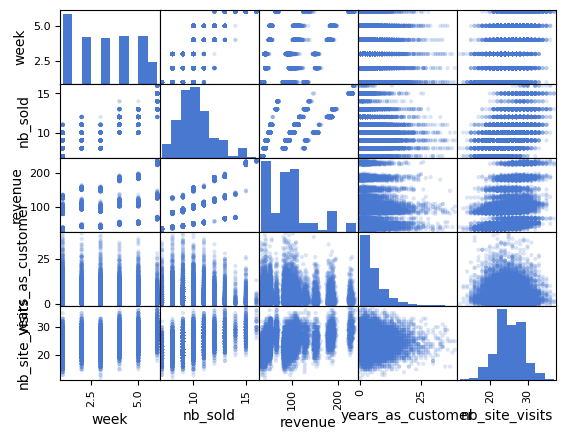

In [39]:
pd.plotting.scatter_matrix(sales, alpha = 0.2)

In [40]:
method_counts = sales.groupby('sales_method').count()

print(method_counts)

              week  customer_id  ...  nb_site_visits  state
sales_method                     ...                       
Call          4780         4780  ...            4780   4780
Email         6914         6914  ...            6914   6914
Email + Call  2203         2203  ...            2203   2203
em + call       20           20  ...              20     20
email            7            7  ...               7      7

[5 rows x 7 columns]


In [41]:
sales = sales.replace(to_replace = 'em + call', value = 'Email + Call' )
sales = sales.replace(to_replace = 'email', value = 'Email')

method_count = sales.groupby('sales_method')['nb_sold'].count()
print(method_count)

sales_method
Call            4780
Email           6921
Email + Call    2223
Name: nb_sold, dtype: int64


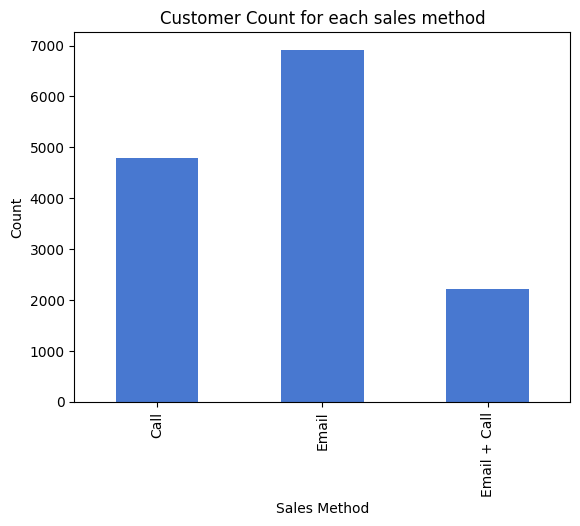

In [42]:
method_count.plot(kind='bar', ylabel = 'Count',
                  title='Customer Count for each sales method')
plt.xlabel('Sales Method')
plt.show()

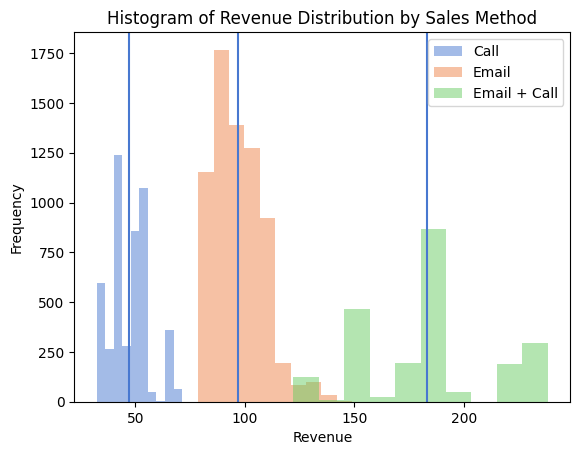

In [43]:
sales.groupby('sales_method')['revenue'].plot(kind='hist', alpha=0.5, legend = True)
##plt.scatter('revenue', 'nb_sold', data=sales)
means = sales.groupby('sales_method')['revenue'].mean()
plt.axvline(x=47, label = 'Mean of Call')
plt.axvline(x=97, label = 'Mean of Email')
plt.axvline(x=183, label = 'Mean of Email + Call')
plt.title('Histogram of Revenue Distribution by Sales Method')
plt.xlabel('Revenue')
plt.show()

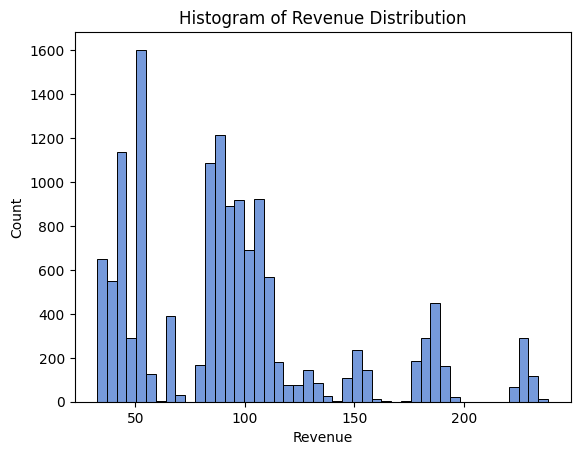

In [44]:
sns.histplot(x='revenue', data=sales)
plt.title('Histogram of Revenue Distribution')
plt.xlabel('Revenue')
plt.show()

In [45]:
print(means)

sales_method
Call             47.596866
Email            97.127671
Email + Call    183.651233
Name: revenue, dtype: float64


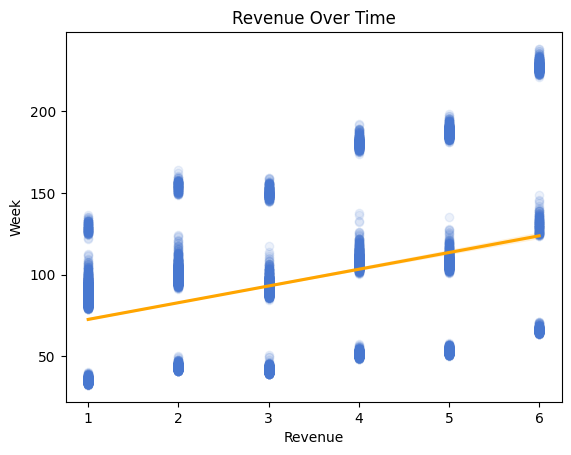

In [62]:
sns.regplot(x='week', y='revenue', data= sales, scatter=False, fit_reg=True, color="orange")
plt.scatter(x='week', y='revenue', data= sales, alpha=0.1)
plt.title("Revenue Over Time")
plt.xlabel('Revenue')
plt.ylabel('Week')
#sns.lmplot(x='week', y='revenue', data = sales)
#plt.title("Revenue Over Time with Trendline")
#plt.xlabel('Revenue')
#plt.ylabel('Week')
plt.show()

In [47]:
sales[['week', 'revenue']].corr()

,week,revenue
week,1.000000,0.356239
revenue,0.356239,1.000000


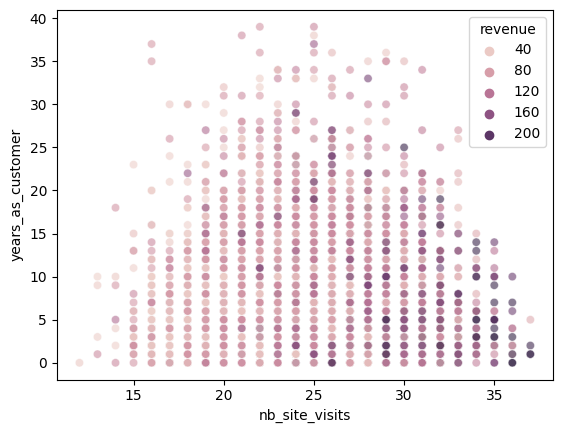

In [48]:
sns.scatterplot(y='years_as_customer', x='nb_site_visits', data=sales, hue='revenue', alpha = 0.6)
plt.show()


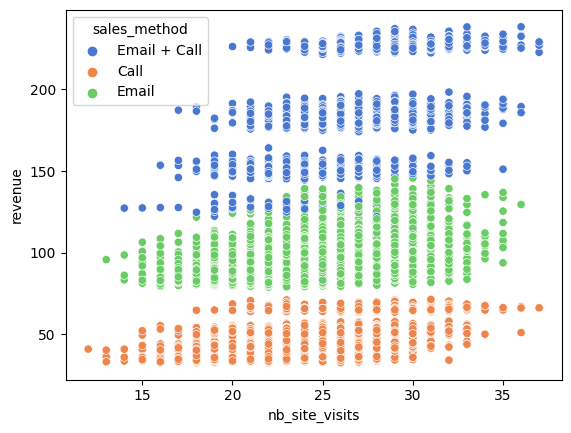

In [49]:
sns.scatterplot(x='nb_site_visits', y='revenue', hue='sales_method', data=sales)
plt.show()

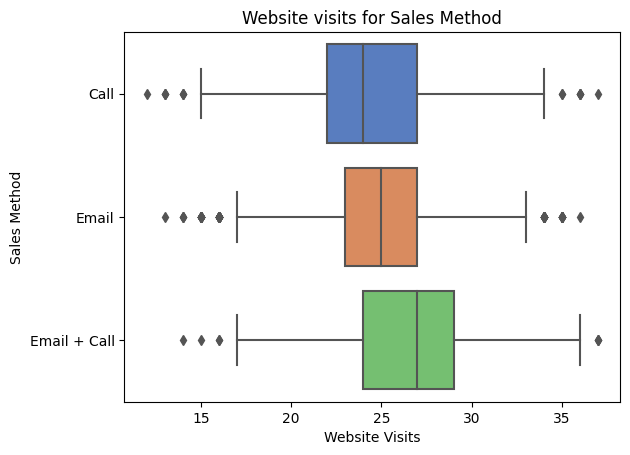

In [50]:
sns.boxplot(x='nb_site_visits', y='sales_method', data=sales, 
            order=['Call', 'Email', 'Email + Call'])
plt.title('Website visits for Sales Method')
plt.xlabel('Website Visits')
plt.ylabel('Sales Method')
plt.show()

In [51]:
emails_calls = sales[sales['sales_method'] == 'Email + Call']['revenue'].fillna(0)

email = sales[sales['sales_method'] == 'Email']['revenue'].fillna(0)

t_test = stats.ttest_ind(emails_calls, email, equal_var= False)

print(t_test)

Ttest_indResult(statistic=137.0335160175482, pvalue=0.0)


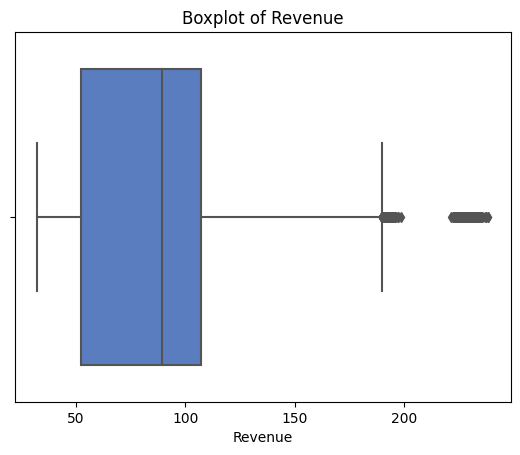

In [52]:
sns.boxplot(x='revenue', data = sales, meanline = True)
plt.title('Boxplot of Revenue')
plt.xlabel('Revenue')
plt.show()

In [53]:
errors = sales[sales['revenue'].isna()]['nb_sold']

print(errors.count())

0


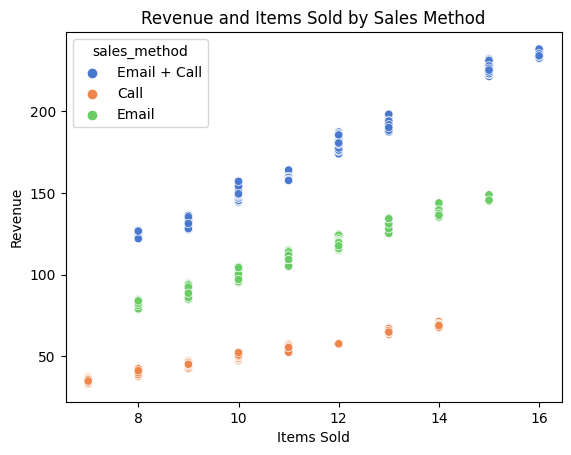

In [63]:
sns.scatterplot(x='nb_sold', y='revenue', hue='sales_method', data = sales)
plt.title('Revenue and Items Sold by Sales Method')
plt.xlabel('Items Sold')
plt.ylabel('Revenue')
plt.show()

In [55]:
num1 = sales.groupby('state')['revenue'].sum()
print(num1.sort_values(ascending=False))

state
California        160893.20
Texas             106294.45
New York           83242.74
Florida            77651.75
Illinois           52649.35
Pennsylvania       51595.35
Ohio               48010.94
Michigan           44424.81
Georgia            43426.41
North Carolina     38418.15
New Jersey         36527.03
Virginia           33749.37
Indiana            30624.27
Washington         30398.39
Tennessee          27694.97
Arizona            27201.18
Missouri           25859.42
Massachusetts      25225.59
Maryland           22789.32
Wisconsin          21989.49
Minnesota          21352.64
South Carolina     21344.17
Oregon             21072.33
Louisiana          20214.17
Alabama            19583.86
Colorado           19545.48
Kentucky           18961.13
Oklahoma           17701.65
Connecticut        16352.65
Iowa               13978.13
Mississippi        13349.49
Kansas             11941.95
Utah               11440.50
Arkansas           10795.38
Nevada              9587.55
Nebraska      

In [56]:
num2 = (sales.groupby('state')['revenue'].sum())/(sales.groupby('state')['revenue'].count())
print(num2.sort_values(ascending=False))

state
South Dakota      104.755000
North Dakota      104.077200
Delaware          102.993333
Idaho             102.108305
Vermont           101.756667
Mississippi       100.372105
South Carolina    100.207371
West Virginia     100.025844
Utah               99.482609
Nevada             98.840722
Oregon             98.468832
Washington         98.376667
Nebraska           98.151395
New Mexico         97.937595
Connecticut        97.920060
Virginia           97.541532
Hawaii             97.397761
Alabama            96.949802
Rhode Island       96.295122
Oklahoma           96.204620
Wyoming            95.994062
Texas              95.847115
Michigan           95.332210
Louisiana          94.902207
Georgia            94.405239
Florida            94.009383
Kentucky           93.866980
Indiana            93.652202
Minnesota          93.651930
Wisconsin          93.572298
Massachusetts      93.428111
Pennsylvania       93.300814
Maryland           93.017633
California         92.627058
New York

In [57]:
num3 = sales.groupby('state')['revenue'].mean()

print(num3.sort_values(ascending=False))

state
South Dakota      104.755000
North Dakota      104.077200
Delaware          102.993333
Idaho             102.108305
Vermont           101.756667
Mississippi       100.372105
South Carolina    100.207371
West Virginia     100.025844
Utah               99.482609
Nevada             98.840722
Oregon             98.468832
Washington         98.376667
Nebraska           98.151395
New Mexico         97.937595
Connecticut        97.920060
Virginia           97.541532
Hawaii             97.397761
Alabama            96.949802
Rhode Island       96.295122
Oklahoma           96.204620
Wyoming            95.994062
Texas              95.847115
Michigan           95.332210
Louisiana          94.902207
Georgia            94.405239
Florida            94.009383
Kentucky           93.866980
Indiana            93.652202
Minnesota          93.651930
Wisconsin          93.572298
Massachusetts      93.428111
Pennsylvania       93.300814
Maryland           93.017633
California         92.627058
New York

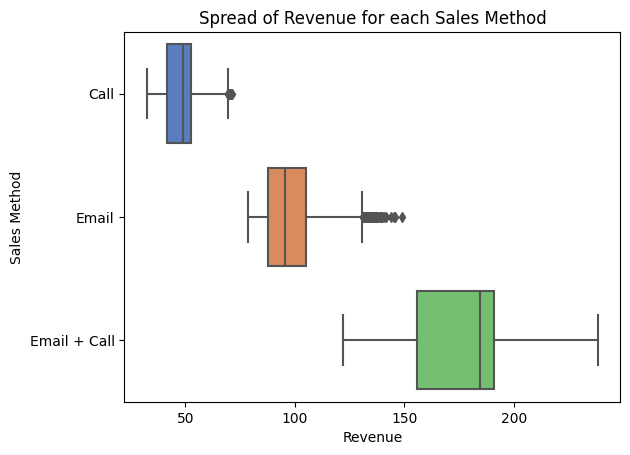

In [58]:
sns.boxplot(x='revenue', y='sales_method', data= sales, 
            order=['Call', 'Email', 'Email + Call'], meanline = True)
plt.title('Spread of Revenue for each Sales Method')
plt.ylabel('Sales Method')
plt.xlabel('Revenue')
plt.show()

sales_method
Call            5.152720
Email           4.989886
Email + Call    4.526316
Name: years_as_customer, dtype: float64
              years_as_customer  nb_site_visits
sales_method                                   
Call                   5.152720       24.421757
Email                  4.989886       24.734142
Email + Call           4.526316       26.738641


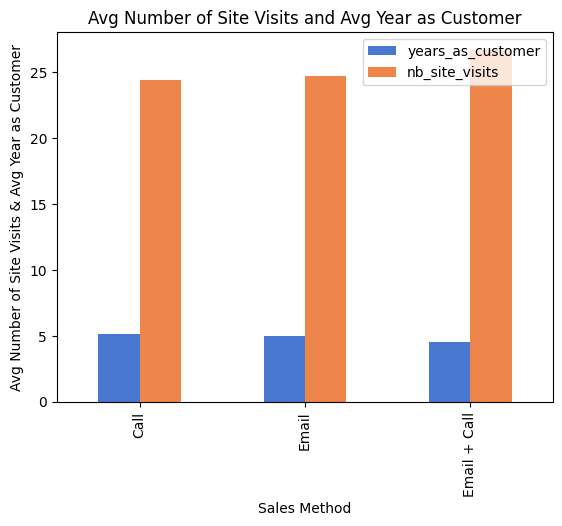

In [59]:
years = sales.groupby('sales_method')['years_as_customer'].mean()
print(years)

site_visits = sales.groupby('sales_method')[['years_as_customer', 'nb_site_visits']].mean()
site_visits.plot(kind='bar')
plt.ylabel('Avg Number of Site Visits & Avg Year as Customer')
plt.xlabel('Sales Method')
plt.title('Avg Number of Site Visits and Avg Year as Customer')

print(site_visits)